In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

# An Intro to Univariate and Multivariate Linear Regression



### Nelson Liu
### December 5th, 2016

# The Problem

- Let's say we want to predict how much a house in Boston will cost given the number of rooms that it has.
- This is a **regression problem**, which indicates that we are predicting a real valued output
  - To contrast, classification predicts...?

# Let's get our data and (crudely) visualize it

In [2]:
boston_dataset = load_boston()
# extract prices (in thousands)
house_prices = boston_dataset.target
num_rooms = boston_dataset.data[:,5].reshape(-1, 1)

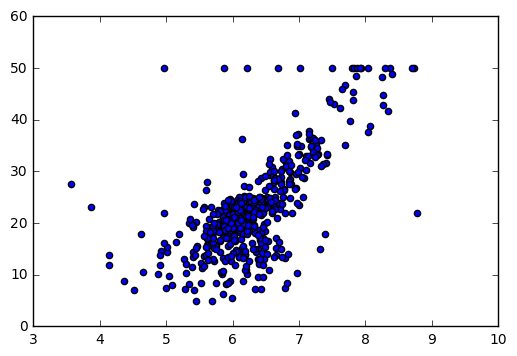

In [3]:
plt.scatter(num_rooms, house_prices)
plt.show()

Seems pretty "linear"...

# A Note About Notation

- X = "input" variable (features). We want to make predictions given this information.

- Y = "output" variable (target). We want to guess this value, given X.

- n = number of training samples we have.

- (x, y) one specific training example (note the lowercase)

- ($x^{(i)}, y^{(i)}$) the i-th training example, where $i \in [0, n-1]$
  - e.g., ($x^{(1)}, y^{(1)}$) is the first training example
  - not to be confused with power!

# Machine Learning and Functions

- There is an unknown function $f(x) = y$ that takes input from the world and predicts a value from it
  - In our case, $f(x)$ is a function from average # of rooms/house in a suburb to average price of a house in that suburb.

- The goal of machine learning: guess (approximate) this function $f(x) = y$ given inputs and outputs.
  - Our machine learning system guesses a "hypothesis" $h(x)$, where we hope $h(x) \approx f(x)$

- In univariate linear regression, we want a hypothesis of the form $h(x) = \theta_0 + \theta_1x$
  - This corresponds to a straight line in the Cartesian plane
  - The $\theta$'s are known as **parameters** of our function, and we want to find the values that best fit the data

# How do we fit this straight line to our data?

- $h(x) = \theta_0 + \theta_1x$
- We need to "tune" parameters! By changing the values of $\theta_0$ and $\theta_1$, we generate different lines.
  - So we want to choose values of $\theta_0$ and $\theta_1$ to make $h(x)$ generate y as accurately as possible for some data x

# Formalizing this intuition

- We want to find the values of $\theta_0$ and $\theta_1$ to minimize the error between our predicted value $h(x)$ and our true value $y$ for an arbitrary $(x, y)$ pair in our training set.

- cost = $ \frac{1}{2n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)})^2$
- $h(x) = \theta_0 + \theta_1x$

- Note that the values of $\theta_0$ and $\theta_1$ control the values of $h(x_i)$, and $y_i$ is constant.
  - Thus, the cost function varies on $\theta_0$ and $\theta_1$
  - we want to find the values of $\theta_0$ and $\theta_1$ to minimize the cost function!

# Cost Function

- our goal is to minimize the cost function.
  - We'll represent the cost function as $C(\theta_0,\theta_1)$
  - The idea is that the values of the parameters that minimize the cost function should give us a good model.

# Visualizing the Cost Function

- So let's return to our task above. We want to find a function $h(x) = y$ to approximate housing prices based on the number of rooms, which would entail minimizing our cost function $C(\theta_0,\theta_1)$.

- Since $C(\theta_0,\theta_1)$ depends on two variables and outputs one value, we can visualize it in 3-d.
  - Let's plug in a bunch of values of $\theta_0$ and $\theta_1$ to $C(\theta_0,\theta_1)$ and see what it looks like

In [4]:
# theta_0 = y-intercept
# theta_1 = slope
# num_rooms = array with the average number of rooms in the suburb
# prices = array with the average price in the suburb
# n = number of training examples

def compute_cost(theta_0, theta_1, num_rooms, prices):
    total_squared_error = 0.0
    n = len(num_rooms)
    for i in range(n):
        # compute h(x_i), where x_i = num_rooms[i] for the values of 
        # theta_0 and theta_1
        h_x = (theta_1 * num_rooms[i][0]) + theta_0
        
        # compute the difference between our guess
        # for h(x_i) and the true value y_i
        raw_error = prices[i] - h_x
        
        # square the error to make the function differentiable
        # and make the error positive
        squared_error = raw_error**2
        
        # add it to the total
        total_squared_error += squared_error
    MSE = total_squared_error / (2.0 * n)
    return MSE

In [5]:
# you don't really need to know what this code does, but you should
# know what the visualization means. This might take awhile to run.
def plot_cost_function(rotate=False):
    fig = plt.figure(figsize=(16, 16))
    ax = fig.gca(projection='3d')

    # values of theta_0 (intercept) and theta_1 (slope) to try
    theta_0s = np.linspace(-50, -20, 100)
    theta_1s = np.linspace(0, 20, 100)

    # create meshgrid out of them
    theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0s, theta_1s)
    mses = np.array([compute_cost(theta_0, theta_1, num_rooms, house_prices) 
                       for theta_0, theta_1 in zip(np.ravel(theta_0_mesh), 
                                                   np.ravel(theta_1_mesh))])
    mse = mses.reshape(theta_0_mesh.shape)

    if rotate is True:
        surf = ax.plot_surface(theta_1_mesh, theta_0_mesh, mse, 
                               rstride=1, cstride=1, linewidth=0.1, 
                               cmap=cm.coolwarm, alpha=0.5)
    else:
        surf = ax.plot_surface(theta_0_mesh, theta_1_mesh, mse, 
                               rstride=1, cstride=1, linewidth=0.1, 
                               cmap=cm.coolwarm, alpha=0.5)

    if rotate is True:
        ax.set_xlabel('theta 1 (slope)')
        ax.set_ylabel('theta 0 (intercept)')
    else:
        ax.set_xlabel('theta 0 (intercept)')
        ax.set_ylabel('theta 1 (slope)')
    ax.set_zlabel('MSE')
    plt.show()

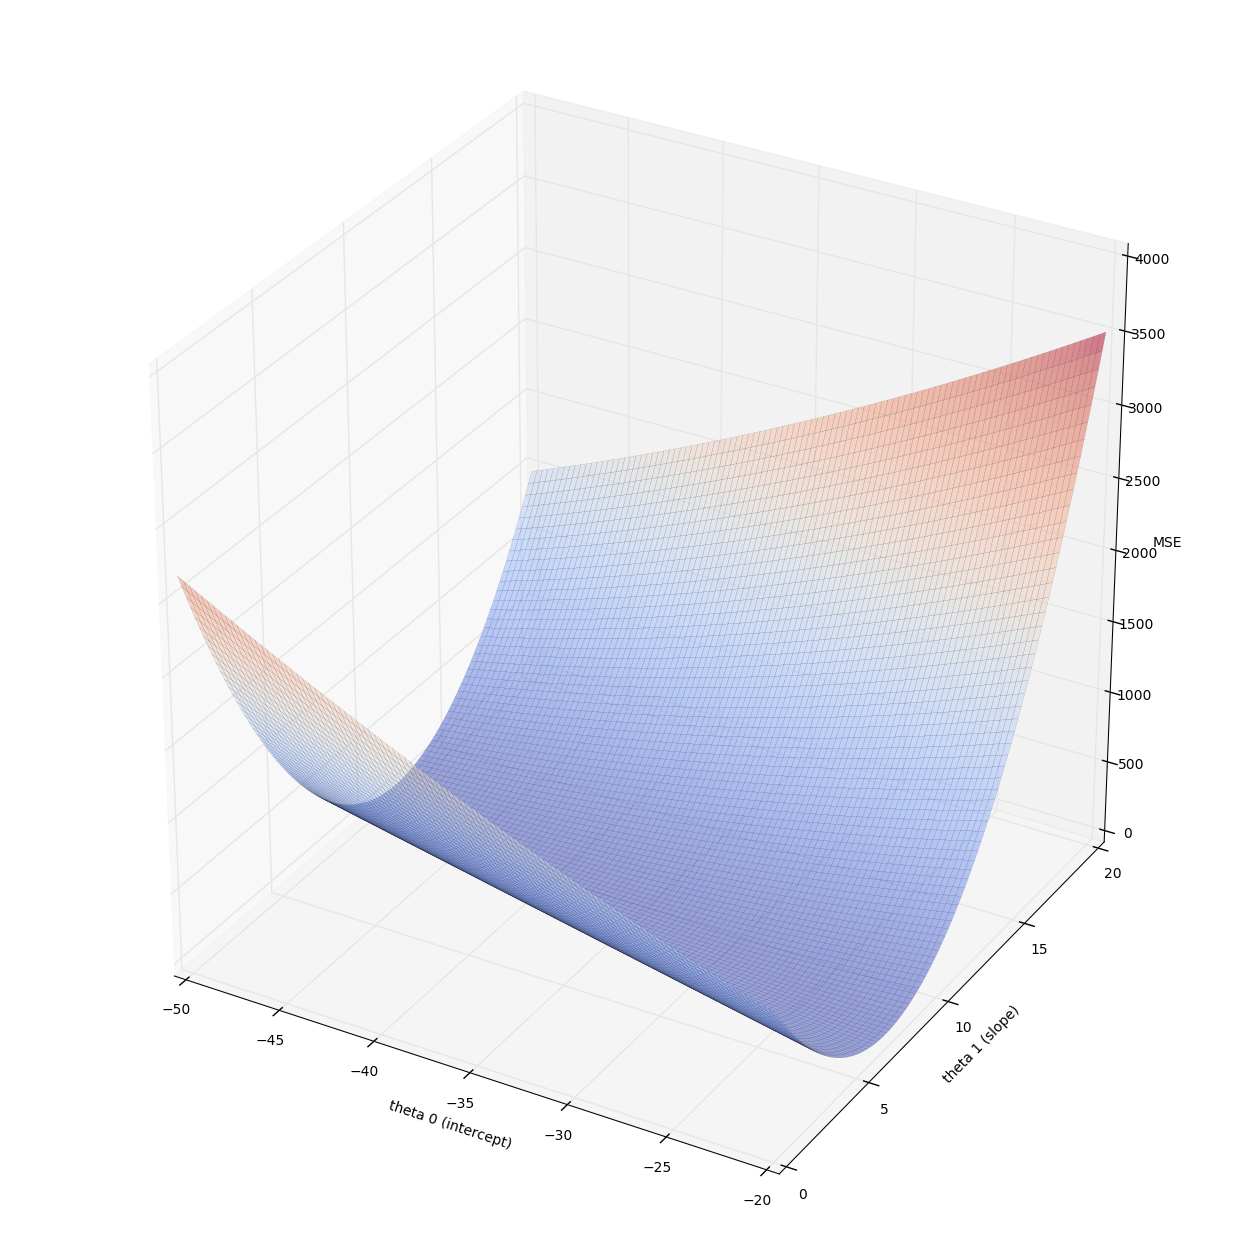

In [6]:
plot_cost_function()

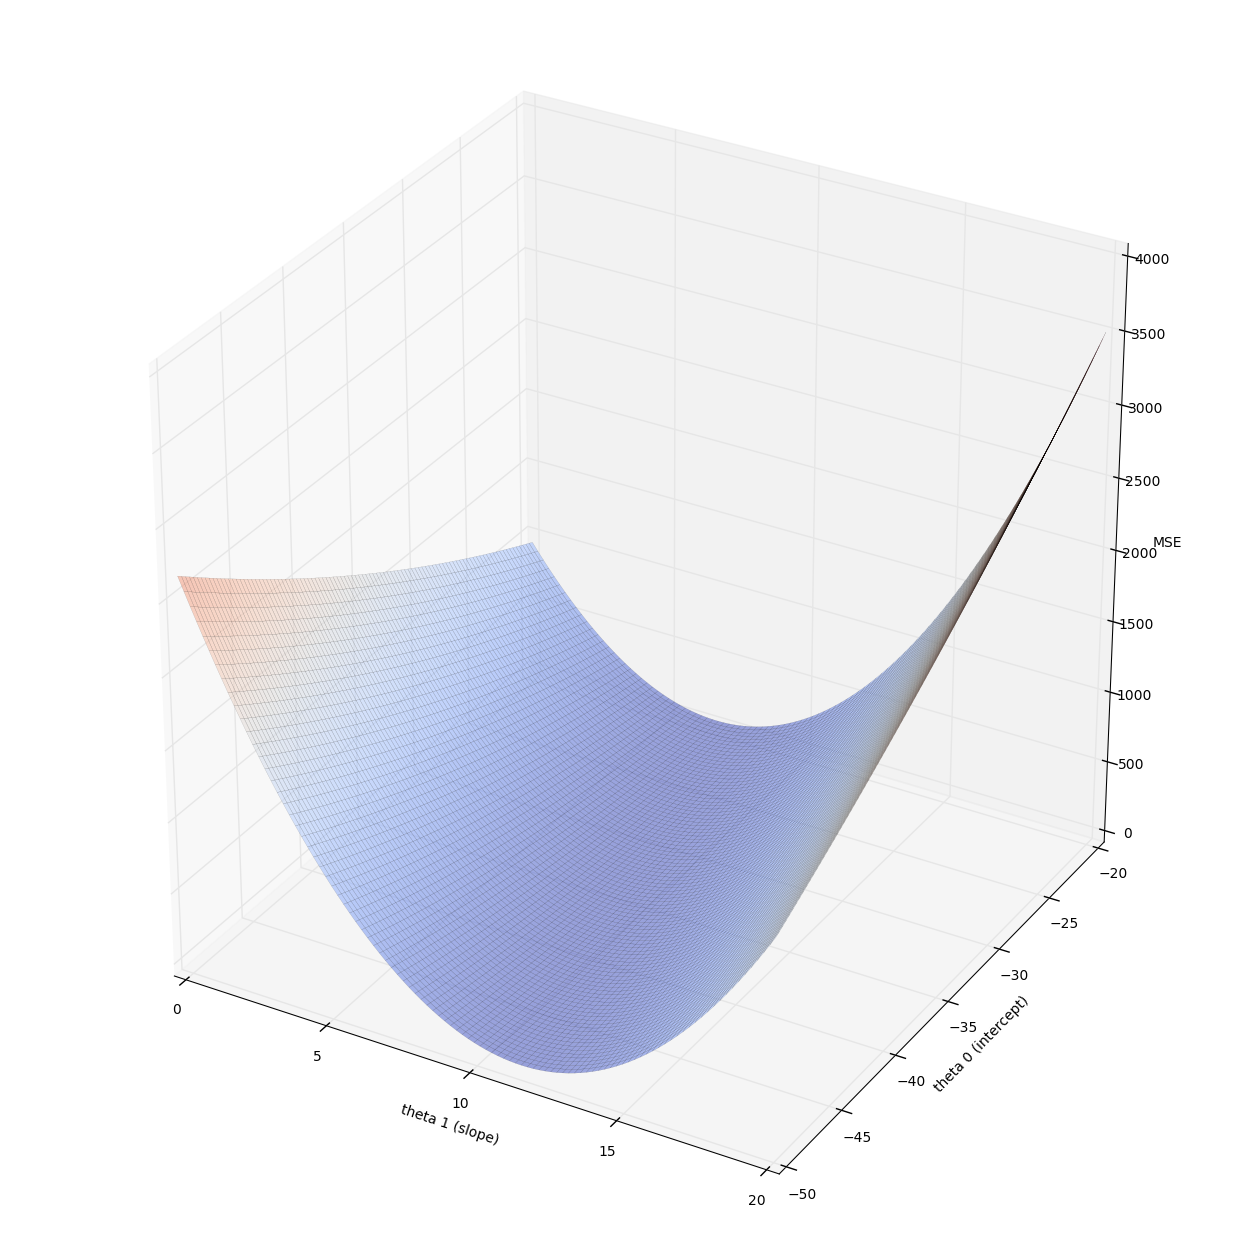

In [7]:
plot_cost_function(rotate=True)

# What do you think the optimal parameters are, based on the previous figures?

- Wouldn't it be nice to have an algorithm to automatically figure this out for you, given the plot?
  - This algorithm is called **Gradient Descent**

# Gradient Descent

- Method for optimizing the value of the parameters to minimize the cost function $C(\theta_0, \theta_1)$.
  - Used broadly throughout machine learning (e.g. neural nets) and numerical optimization.

# Gradient Descent -- Intuition in Pictures
![Gradient Descent As Hill-Climbing](./img/ng_gradient_descent.png)

- walking down a hill, taking a step in the steepest downhill direction each time.
  - keep doing this until you reach a minimum

# Gradient Descent Algorithm

- repeat until you reach a local min (convergence):
  - for j in {0,1}:
    - $\theta_j = \theta_j - \alpha(\frac{\partial}{\partial\theta_j} C(\theta_0, \theta_1))$


- $\alpha$ refers to the learning rate
  - how big of a step we take in a particular direction when updating $\theta_j$

- $\frac{\partial}{\partial\theta_j} C(\theta_0, \theta_1)$ is the partial derivative of $C$
  - find the slope of function, and adjust the parameter to minimize $C$.

# Gradient Descent on Linear Regression

$$\frac{\partial}{\partial\theta_j} C(\theta_0, \theta_1) = \frac{\partial}{\partial\theta_j} \left(\frac{1}{2n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)})^2\right)$$

$$\frac{\partial}{\partial\theta_j} C(\theta_0, \theta_1) = \frac{\partial}{\partial\theta_j} \left(\frac{1}{2n} \sum \limits_{i=1}^{n} ((\theta_0 + \theta_1x^{(i)}) - y^{(i)})^2\right)$$

- calculating out the derivatives...(proof left as an exercise)

$$j=0 : \frac{\partial}{\partial\theta_0} C(\theta_0, \theta_1) = \frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)})$$
$$j=1 : \frac{\partial}{\partial\theta_0} C(\theta_0, \theta_1) = \frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) \times x^{(i)}$$

# Gradient Descent on Linear Regression (cont.)

- repeat until you reach a local min (convergence):
  - for j in {0,1}:
    - $\theta_0 = \theta_0 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)})$
    - $\theta_1 = \theta_1 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) \times x_i$

- make sure to simulataneously update $\theta_0$ and $\theta_1$

### In pseudocode
- repeat until you reach a local min (convergence):
  - for j in {0,1}:
    - temp_0 $= \theta_0 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)})$
    - temp_1 $= \theta_1 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) \times x^{(i)}$
    - $\theta_0 =$ temp_0
    - $\theta_1 =$ temp_1

# How do we extend this to multiple variables?

- There are a lot more factors than just # of rooms in pricing a house
  - location, age of house, etc

- It'd be great if we could incorporate information about multiple variables in our models
  - Multivariate Linear Regression!

# Adjusting the Hypothesis

- Previously (in the univariate case), $h(x) = \theta_0 + \theta_1x$
  - To generalize this to more variables, we just add more terms!

- Say we have 3 input variables (features)
  - $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3$
  - $x_j$ is the jth feature.

- generally, $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

# Vector Representation

- To make the notation a bit cleaner, let's define $x_0 = 1$.
  - $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta_0 \cdot 1 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

$X = 
  \begin{pmatrix}
    x_0\\
    x_1\\
    \vdots\\
    x_n
  \end{pmatrix}$ and 
  $\theta =
  \begin{pmatrix}
    \theta_0\\
    \theta_1\\
    \vdots\\
    \theta_n
  \end{pmatrix}$, so $h(x) = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta^TX$


- $X$ and $\theta$ are 1 x (n+1), or "column vectors"

$\theta^T = 
\begin{bmatrix} 
  \theta_0 & \theta_1 & \dots & \theta_n
\end{bmatrix}$
- (n+1) x 1 matrix, or a "row vector"

# Summary So Far: Multivariate Linear Regression


- hypothesis: $h(x) = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta^TX$
  - $x_0 = 1$, $x_j$ indicates the $jth$ feature (input variable)

- Parameters of model: $\theta_0, \theta_1, ... \theta_n$, represented simply as $\theta$ 
  - $\theta$ is a n+1 dimensional column vector, where the elements are $\theta_0, \theta_1, ... \theta_n$

- Cost function: $C(\theta_0, \theta_1, ... \theta_n) = \frac{1}{2n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)})^2$

- Optimization by gradient descent:
  - repeat $\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} C(\theta)$ until convergence
  - simultaneously update for every j = 0...n

# Univariate vs Multivariate Gradient Descent

### Univariate
- repeat until you reach a local min (convergence):
  - for j in {0,1}:
    - $\theta_0 = \theta_0 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)})$
    - $\theta_1 = \theta_1 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) \times x_i$

### Multivariate
- repeat until you reach a local min (convergence):
  - for j in {0...n}:
    - $\theta_j = \theta_j - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) x_j^{(i)}$

# A closer look at the multivariate partial derivative

$$\theta_j = \theta_j - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) x_j^{(i)}$$
$$\theta_0 = \theta_0 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) x_0^{(i)}$$
$$\theta_1 = \theta_1 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) x_1^{(i)}$$
$$\theta_1 = \theta_2 - \alpha\frac{1}{n} \sum \limits_{i=1}^{n} (h(x^{(i)}) - y^{(i)}) x_2^{(i)}$$

- Recall $x_0 = 1$
- The partial derivatives are the same in uni vs multivariate! Just taking them over more variables.

# Parting Remarks: The Normal Equation

- Solve for the values of our parameter vector $\theta$ automatically!

$\theta = (X^T X)^{-1} X^T Y$

## Gradient Descent vs. Normal Equation
- In gradient descent, you need to pick a good value of $\alpha$
  - Not necessary when using normal equations
- Gradient descent needs many iterations
  - No iteration in normal equation
- Gradient descent scales very well when we have many features (just compute some more derivatives) 
  - must calculate $(X^T X)^{-1}$, which can be slow if $n$ is very large (10,000+ features).